In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import cv2
import os
import random
from sklearn.preprocessing import LabelEncoder
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.preprocessing import StandardScaler

In [ ]:
# pip install opencv-python

In [ ]:
input_dir= "/content/drive/My Drive/DS Workshop/Brain Tumor Prediction"
class_names = os.listdir(input_dir)
class_names

['Yes', 'No']

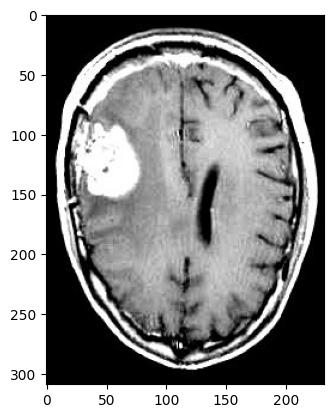

In [ ]:
pred_dir= "/content/drive/My Drive/DS Workshop/Brain Tumor Prediction/Yes/y2.jpg"
img = cv2.imread(pred_dir)
plt.imshow(img)

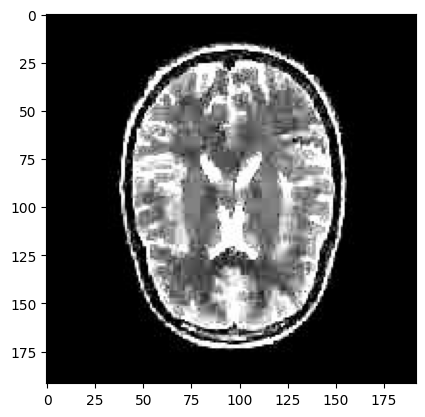

In [ ]:
pred_dir= "/content/drive/My Drive/DS Workshop/Brain Tumor Prediction/No/no2.jpg"
img = cv2.imread(pred_dir)
plt.imshow(img)

In [ ]:
yes_path =  "/content/drive/My Drive/DS Workshop/Brain Tumor Prediction/Yes"
no_path =  "/content/drive/My Drive/DS Workshop/Brain Tumor Prediction/No"

In [ ]:
# Load VGG16 model
model = VGG16(weights='imagenet', include_top=False)

# Function to extract features from an image
def extract_features(img_path):
    img = cv2.imread(img_path)
    img = cv2.resize(img, (224, 224))  # Resize images to 50x50
    img = np.expand_dims(img, axis=0)  # Add batch dimension
    img = preprocess_input(img)

    # Extract features using VGG16
    features = model.predict(img)
    return features.flatten()

print("VGG16 Model loaded sucessufully.!!")

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
VGG16 Model loaded sucessufully.!!


In [ ]:
# List of class names and corresponding labels
class_names = ['No','Yes']
class_labels = {class_name: label for label, class_name in enumerate(class_names)}

In [ ]:
class_labels

{'No': 0, 'Yes': 1}

In [ ]:
images_yes = []
label_yes = []

for filename in os.listdir(yes_path):
  image_path = os.path.join(yes_path,filename)
  features = extract_features(image_path)
  images_yes.append(features)
  label_yes.append("Yes")

df_yes = pd.DataFrame(images_yes)
df_yes["label"] = label_yes


1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 120ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 109ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 108ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━

In [ ]:
images_no = []
label_no = []

for filename in os.listdir(no_path):
  image_path = os.path.join(no_path,filename)
  features = extract_features(image_path)
  images_no.append(features)
  label_no.append("No")

df_no = pd.DataFrame(images_no)
df_no["label"] = label_no


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step
1/1 ━━━━━━━━

In [ ]:
df_yes.shape

(197, 25089)

In [ ]:
df_no.shape

(129, 25089)

In [ ]:
feature_df = pd.concat([df_yes,df_no])
feature_df.shape

(326, 25089)

In [ ]:
feature_df

,0,1,2,3,4,5,6,7,8,9,...,25079,25080,25081,25082,25083,25084,25085,25086,25087,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,5.396637,0.000000,18.977297,0.0,Yes
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,5.318859,0.0,Yes
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,29.730213,0.000000,0.000000,0.0,Yes
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,Yes
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.748234,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,2.923442,0.0,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,1.395021,0.0,No
125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,4.275799,0.0,No
126,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.0,No
127,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,4.507093,0.567389,0.000000,0.0,No


In [ ]:
x = feature_df.drop("label",axis=1)

y = feature_df['label']

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)
print("x_train : ",x_train.shape)
print("x_test : ",x_test.shape)
print("y_train : ",y_train.shape)
print("y_test : ",y_test.shape)


x_train :  (228, 25088)
x_test :  (98, 25088)
y_train :  (228,)
y_test :  (98,)


In [ ]:
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression()
print("model created")

LR_model.fit(x_train,y_train)
print("Model training completed")

y_pred = LR_model.predict(x_test)
y_pred

acc = accuracy_score(y_test,y_pred)
print("Accuracy :",acc*100)
print("Error rate : ",1-acc)

model created
Model training completed
Accuracy : 96.93877551020408
Error rate :  0.030612244897959218


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 553ms/step


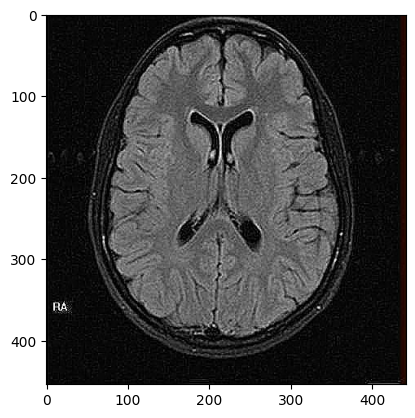

In [ ]:
# Load VGG16 model
pred_dir= "/content/drive/My Drive/DS Workshop/Brain Tumor Prediction/No/no173.jpg"
img = cv2.imread(pred_dir)
plt.imshow(img)

model = VGG16(weights='imagenet', include_top=False)
img = cv2.imread(pred_dir)
img = cv2.resize(img, (224, 224))
img = np.expand_dims(img, axis=0)
img = preprocess_input(img)
features = model.predict(img)
features = features.reshape(1,-1)

In [ ]:
pred=LR_model.predict(features)[0]
print("Prediction is :- ",pred)

Prediction is :-  No
